1 Data Import and Meanings of Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#possibly use plotnine for better graphics

df = pd.read_csv('regiobelief.csv')

print(df.columns)

#land: German federal state
#year: Erhebungsjahr
#doi: Digital Object Identifier
#respid: Identication number of participant
#ep01: "State of the economy toda?" n=59976
#eastwest: Participant in East- or Westgerman
#lp05: "Politicians don't care about ordinary citizens"
#st01: "Trust in other citizens" n=29783
#ingle: Ingleheart Index: Materialist or Postmaterialist or mixed form
#mp02: "Foreigners burden our social security net" n=10312
#mp03: "Foreigners enrichen our culture" n=10337
#iw02: "Corporate profits boost the economy" n=12373
#pn03: "Proud of german athletes"
#pr10: "Socialism: Good Idea, but badly executed" n=22620
#pe09: "Voting is a citizens duty" - n=9989
#pe05: "Politicians represent my interests" n=9881
#pe01: "Politicians don't care about my thoughts" n=12883

2 Data Types and Replacing State Names

In [88]:
df.info()
df["land"]= df["land"].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68161 entries, 0 to 68160
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  68161 non-null  int64 
 1   inc         68161 non-null  int64 
 2   land        68161 non-null  object
 3   year        68161 non-null  int64 
 4   doi         68161 non-null  object
 5   respid      68161 non-null  int64 
 6   ep01        68161 non-null  int64 
 7   eastwest    68161 non-null  int64 
 8   lp05        68161 non-null  int64 
 9   st01        68161 non-null  int64 
 10  ingle       68161 non-null  int64 
 11  mp02        68161 non-null  int64 
 12  mp03        68161 non-null  int64 
 13  iw02        68161 non-null  int64 
 14  pn03        68161 non-null  int64 
 15  pr10        68161 non-null  int64 
 16  pe09        68161 non-null  int64 
 17  pe05        68161 non-null  int64 
 18  pe01        68161 non-null  int64 
dtypes: int64(17), object(2)
memory usage: 9.9+ MB


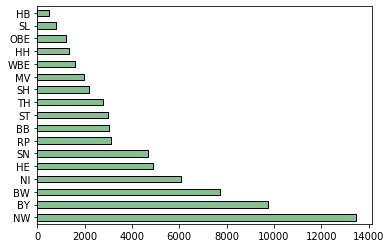

In [89]:
#land --> strings with names

df.loc[(df.land == '10'), 'land'] = 'SH'
df.loc[(df.land == '20'), 'land'] = 'HH'
df.loc[(df.land == '30'), 'land'] = 'NI'
df.loc[(df.land == '40'), 'land'] = 'HB'
df.loc[(df.land == '50'), 'land'] = 'NW'
df.loc[(df.land == '60'), 'land'] = 'HE'
df.loc[(df.land == '70'), 'land'] = 'RP'
df.loc[(df.land == '80'), 'land'] = 'BW'
df.loc[(df.land == '90'), 'land'] = 'BY'
df.loc[(df.land == '100'), 'land'] = 'SL'
df.loc[(df.land == '111'), 'land'] = 'WBE'
df.loc[(df.land == '112'), 'land'] = 'OBE'
df.loc[(df.land == '120'), 'land'] = 'BB'
df.loc[(df.land == '130'), 'land'] = 'MV'
df.loc[(df.land == '140'), 'land'] = 'SN'
df.loc[(df.land == '150'), 'land'] = 'ST'
df.loc[(df.land == '160'), 'land'] = 'TH'

df.land.value_counts().plot(kind='barh',color='#86bf91', edgecolor = 'black')

#10 SH
#20 HH
#30 NI
#40 HB
#50 NW
#60 HE
#70 RP
#80 BW
#90 BY
#100 SL
#111 BE; <ab 1991:> WBE
#112 <Ab 1991:> OBE
#120 <Ab 1991:> BB
#130 <Ab 1991:> MV
#140 <Ab 1991:> SN
#150 <Ab 1991:> ST
#160 <Ab 1991:> TH

    

3 Data Exploration

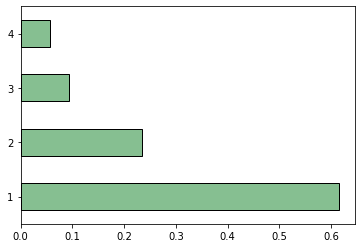

In [5]:

#Select Respondents who gave definite answers
n = df[df['pe09'] > 0]

#Count number of respective answers
m = n.pe09.value_counts(normalize=True)
m.plot(kind='barh',color='#86bf91', edgecolor = 'black')


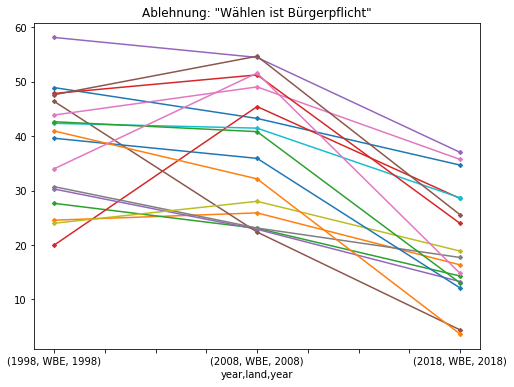

In [21]:
#Select relevant columns
df1 = pd.DataFrame(n, columns=['land', 'year', 'pe09'])


a = df1.loc[df.pe09  > 0]

#Accept pe09
b = df1.loc[(df.pe09 == 1) | (df.pe09 == 2)]

#Deny pe09
c = df1.loc[(df.pe09 == 3) | (df.pe09 == 4)]

#Calculate Totals by State
land_aggr = a.groupby(['land', 'year']).agg({'pe09': 'sum'})

land_aggr

#Calculate Acceptance and Denial by State
b1 = b.groupby(['land','year'], group_keys=False).agg({'pe09': 'sum'})
c1 = c.groupby(['land','year'],group_keys=False).agg({'pe09': 'sum'})

#Calculate Percentages
b2 = b1.groupby(level=1).apply(lambda x: 
                                 100*x /land_aggr).dropna()

c2 = c1.groupby(level=1).apply(lambda x: 
                                100* x /land_aggr).dropna()

#Plot Denial of pe09 by State
fig, ax = plt.subplots(figsize=(8,6))
bp = c2.groupby('land').plot(kind='line', 
                             marker='D', markersize=3,  
                             ax=ax,
                             legend=False,
                             title='Ablehnung: "Wählen ist Bürgerpflicht"')


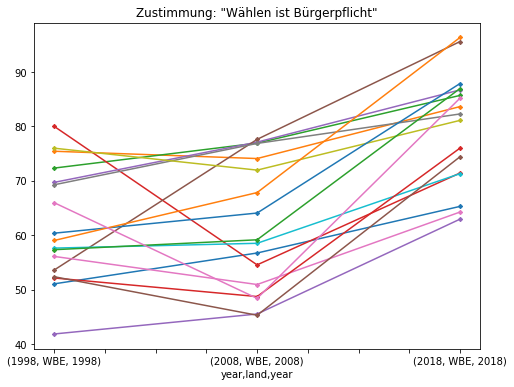

In [20]:
#Plot Acceptance of pe09 by State
fig, ax = plt.subplots(figsize=(8,6))
f = b2.groupby('land').plot(kind='line', 
                             marker='D', markersize=3,  
                             ax=ax,
                             legend=False,
                             title='Zustimmung: "Wählen ist Bürgerpflicht"')


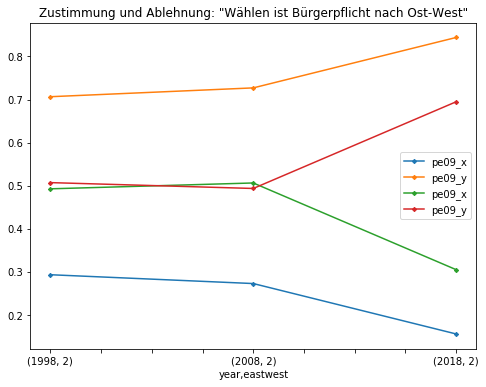

In [87]:
#Relevant columns
pe_ew = pd.DataFrame(n, columns=['eastwest', 'year', 'pe09'])

#Total number of respondesnts by eastwest
pe_ew_agg = pe_ew.groupby(['year', 'eastwest']).agg({'pe09': 'sum'})

#Acceptance
Z = pe_ew.loc[(df.pe09 == 1) | (df.pe09 == 2)]
#Denial
Ab = pe_ew.loc[(df.pe09 == 3) | (df.pe09 == 4)]

#Acceptance and Denial by Eastwest, divided by total respondents by Eastwest
Ab_group=Ab.groupby(['year', 'eastwest']).agg({'pe09': 'sum'})/pe_ew_agg
Z_group=Z.groupby(['year', 'eastwest']).agg({'pe09': 'sum'})/pe_ew_agg

#Merge Acceptance and Denial
df3 = pd.merge(Ab_group, Z_group, on=['year','eastwest'])

#Plot Denial and Acceptance in one
fig, ax = plt.subplots(figsize=(8,6))
f = df3.groupby('eastwest').plot(kind='line', 
                             marker='D', markersize=3,  
                             ax=ax,
                             legend=True,
                             title='Zustimmung und Ablehnung: "Wählen ist Bürgerpflicht nach Ost-West"')

4 Further possible Variable Explorations: ingle, eastwest

1    51498
2    16663
Name: eastwest, dtype: int64

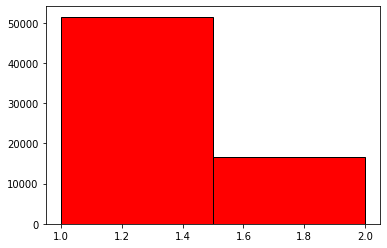

In [86]:
plt.hist(df['eastwest'], color = 'red', edgecolor = 'black',
         bins = 2)

df.eastwest.value_counts()

In [87]:
df.ingle.value_counts()

# Materialisten: va01 Ruhe und Ordnung, va03 Kampf gegen steigende Preise
# Postmaterialisten: va02 Bürger*inneneinfluss, va04 freie Meinungsäusserung

 3     21005
 2     18364
 1     15235
 4     12469
-32     1088
Name: ingle, dtype: int64

Further Goals:

- develop more automated version of averages/year/land with loops?
- develop clear graphics with proper labels, legends and colors
- apply these to further variables to identify more significant regional divergences


Problems:
- Numbers are not representative 
- What does the change of perspective from analysis by State change compared to analysis by Eastwest?
- 